In [463]:
!pip install kagglehub

DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python311\lib\site-packages\mcqgenerator-0.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
    pytz>=2011n
        ~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [464]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1


In [465]:
import os

for paths in os.listdir(r'C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1'):
    print(paths)
    break


Bank Customer Churn Prediction.csv


In [466]:
import pandas as pd

df=pd.read_csv(r'C:/Users/Hp/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [467]:
import pandas as pd
df=pd.read_csv(r'../data/train/train.csv')

In [468]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15601116,686,France,Male,32,6,0.00,2,1,1,179093.26,0
1,15766374,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0
2,15716994,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1
3,15730759,561,France,Female,27,9,135637.00,1,1,0,153080.40,1
4,15797900,517,France,Male,56,9,142147.32,1,0,0,39488.04,1


In [469]:
# drop customer_id
df=df.drop(columns='customer_id')

In [470]:
df.shape

(8000, 11)

In [471]:
# check for missing values
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [472]:
df.duplicated().sum()

0

In [473]:
# check for column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      8000 non-null   int64  
 1   country           8000 non-null   object 
 2   gender            8000 non-null   object 
 3   age               8000 non-null   int64  
 4   tenure            8000 non-null   int64  
 5   balance           8000 non-null   float64
 6   products_number   8000 non-null   int64  
 7   credit_card       8000 non-null   int64  
 8   active_member     8000 non-null   int64  
 9   estimated_salary  8000 non-null   float64
 10  churn             8000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 687.6+ KB


In [474]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,651.647625,38.897750,5.003875,76102.139645,1.531375,0.703500,0.512750,100431.289764,0.205500
std,96.366200,10.518953,2.881822,62461.005757,0.579705,0.456743,0.499869,57518.920431,0.404092
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.000000
25%,585.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51364.125000,0.000000
50%,653.000000,37.000000,5.000000,96447.520000,1.000000,1.000000,1.000000,100487.720000,0.000000
75%,719.000000,44.000000,7.000000,127611.332500,2.000000,1.000000,1.000000,149595.842500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000


 ### Univariate Analysis

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

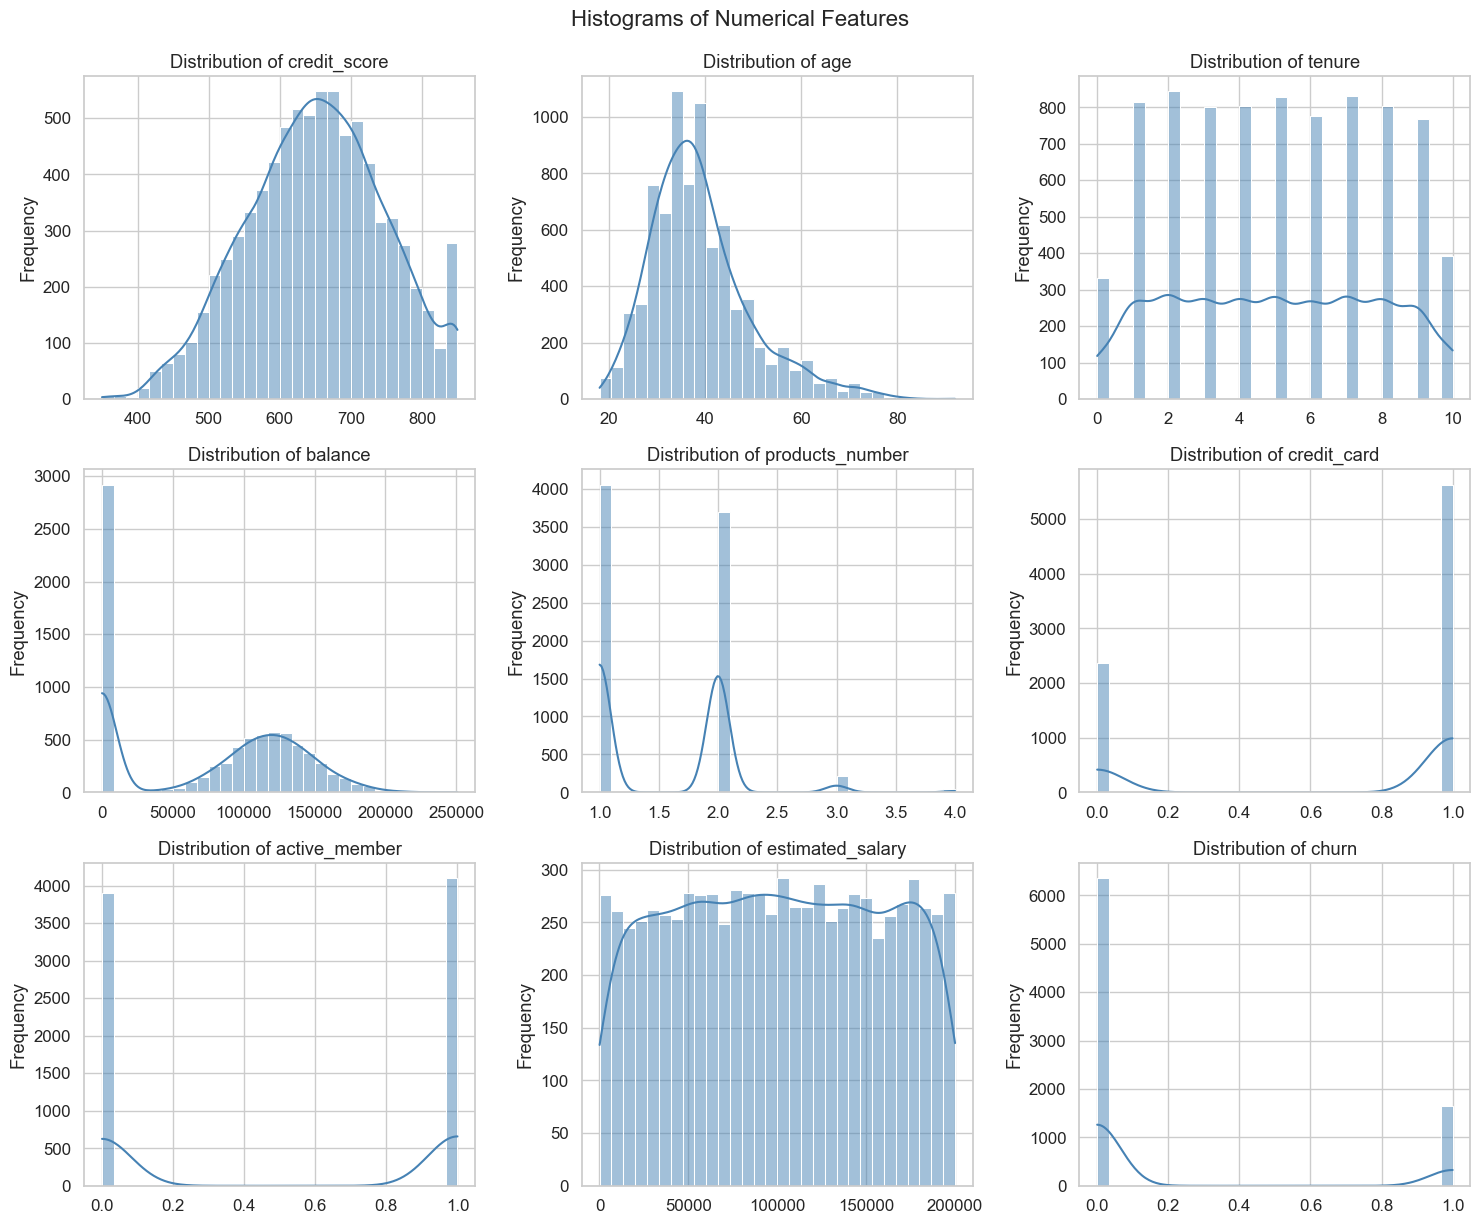

In [475]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numerical_df=df.select_dtypes(include=np.number)
# drop customer id column
#numerical_df=numercial_df.drop(columns='customer_id')

# Optional: for better visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Assuming df is your DataFrame
numerical_cols = numerical_df.columns

# Set up the plot grid (3x3 for 9 features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # flatten the grid to 1D array for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='steelblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

# Turn off empty subplots (if any)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()



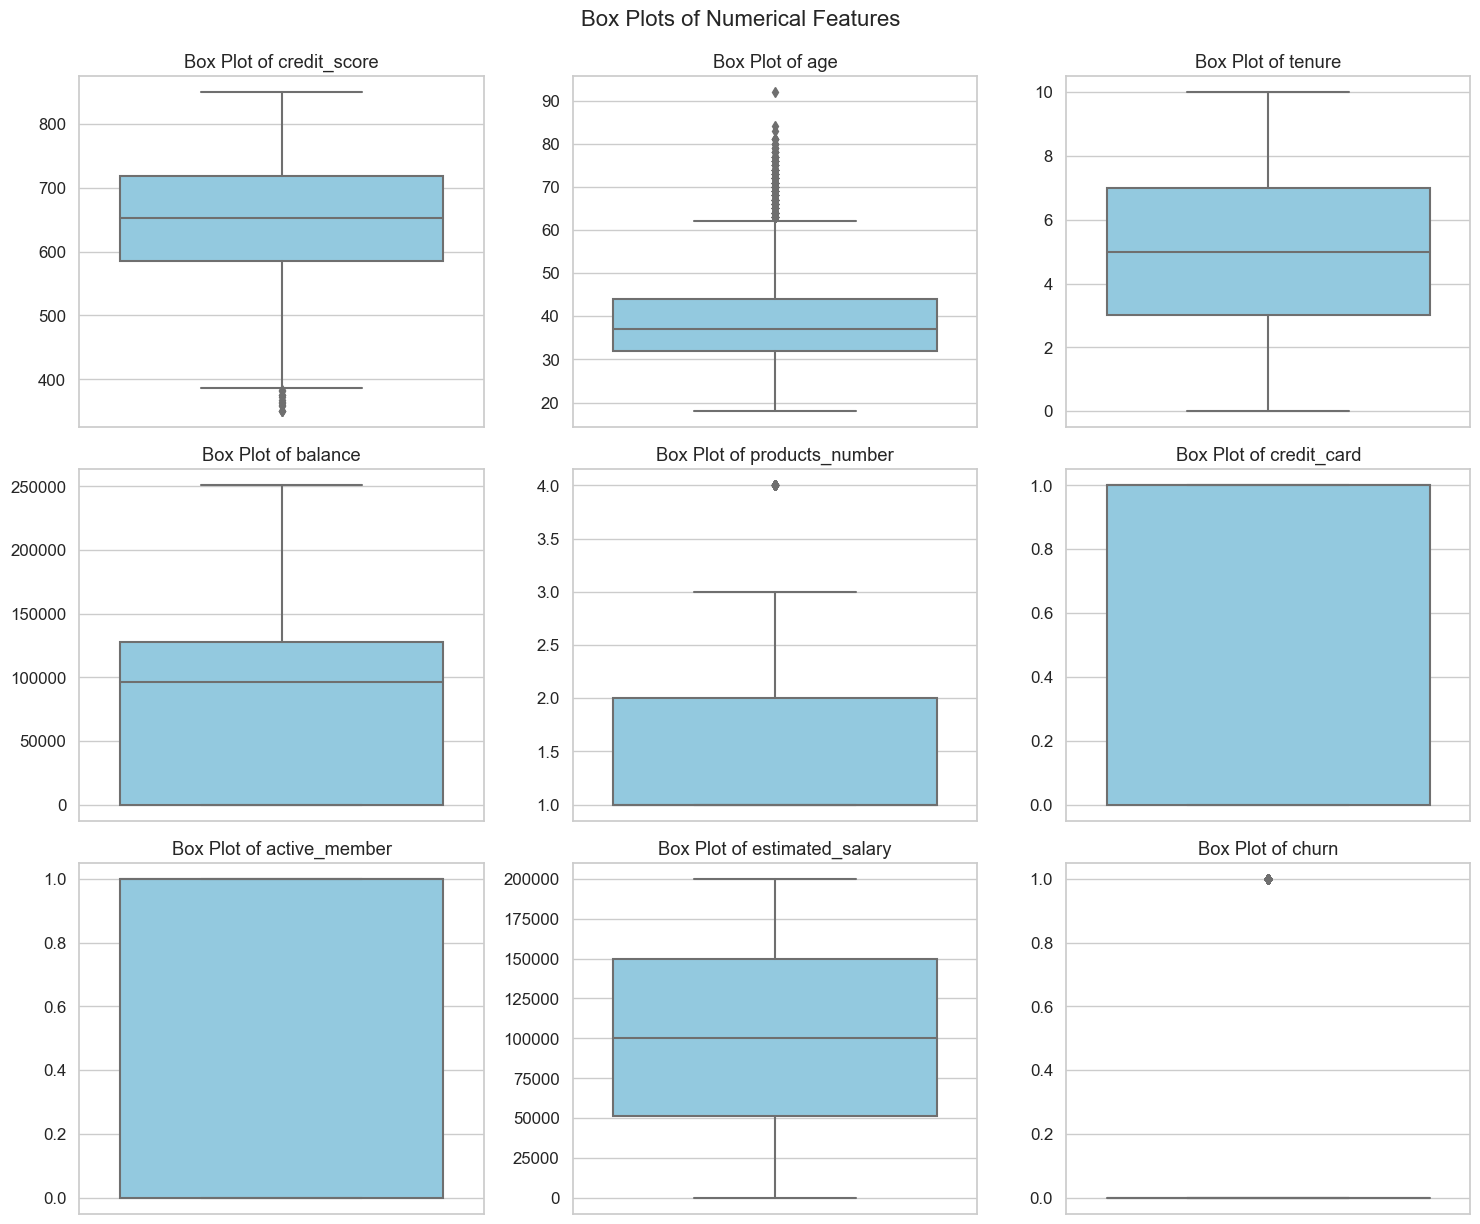

In [476]:
### Box Plot (Outlier Detection)

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for elegance
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Select 9 numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns[:9]

# Create 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Turn off any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()


### Categorical Variables Inspection

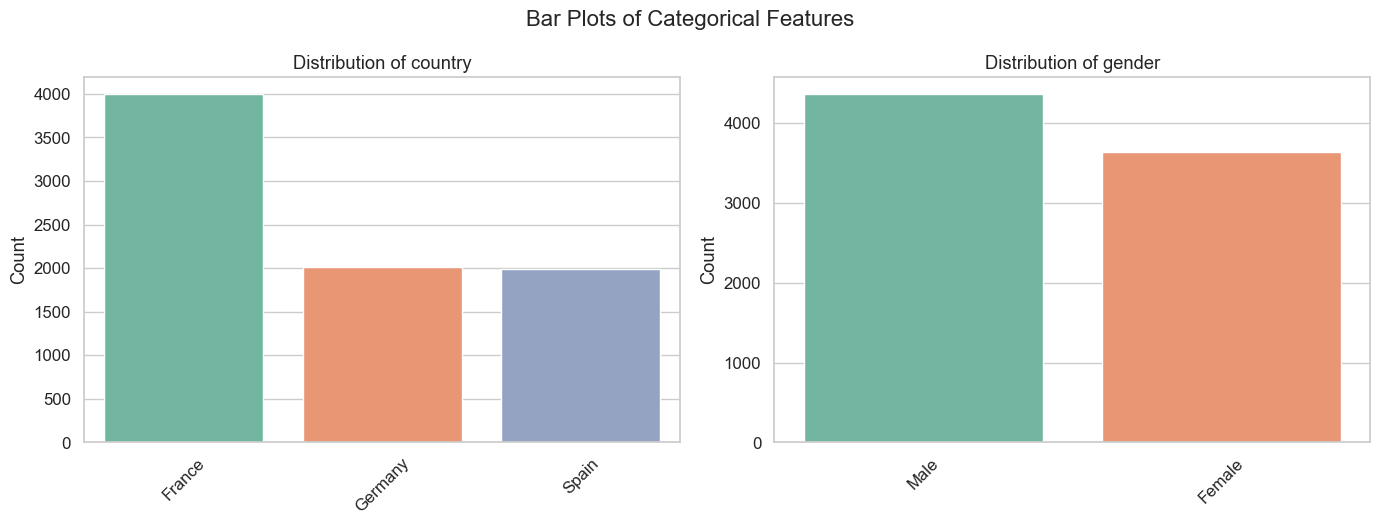

In [477]:
categorical_df=df.select_dtypes(exclude=np.number)
categorical_cols=categorical_df.columns

# Pick the first two categorical columns
cat_cols = categorical_df.columns

# Set seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Create subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate labels if needed

plt.tight_layout()
plt.suptitle("Bar Plots of Categorical Features", fontsize=16, y=1.05)
plt.show()



### Outlier Removal

In [478]:
def remove_outliers(df, columns):
    """
    Removes outliers from specified columns using the IQR method.

    Args:
        df (pd.DataFrame): The input dataframe.
        columns (list): List of column names to check for outliers.

    Returns:
        pd.DataFrame: A new dataframe with outliers removed.
    """
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean


In [479]:
#df=remove_outliers(df, ['age','credit_score','products_number'])

### Check for class imbalance

<Axes: xlabel='churn'>

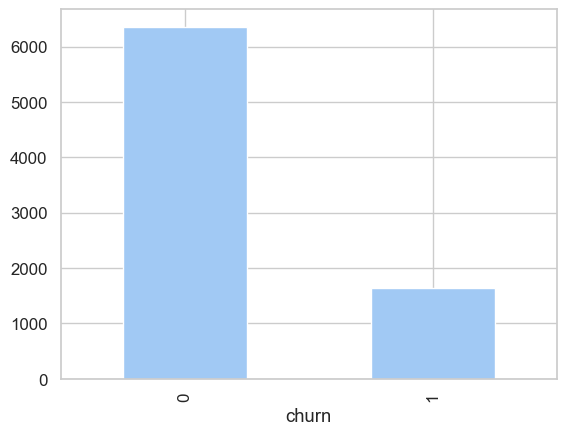

In [480]:
## check for imbalance
df['churn'].value_counts().plot.bar()

### Handle class imbalance

In [481]:
from imblearn.under_sampling import RandomUnderSampler

X_train=df.drop(columns='churn')
y_train=df['churn']

In [482]:
ros=RandomUnderSampler(random_state=42)
X_resampled,y_resampled=ros.fit_resample(X_train,y_train)

In [483]:
X_resampled.shape

(3288, 10)

### Feature Engineering

In [484]:
import pandas as pd
import numpy as np

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Engineer new features from the raw customer churn dataset.

    Parameters:
        df (pd.DataFrame): Original dataset

    Returns:
        pd.DataFrame: DataFrame with additional engineered features
    """

    # Avoid modifying original
    df = df.copy()

    # 1. Interaction features
    df['balance_salary_ratio'] = df['balance'] / (df['estimated_salary'] + 1)  # +1 to avoid divide-by-zero
    df['credit_score_age_ratio'] = df['credit_score'] / (df['age'] + 1)
    df['products_per_year'] = df['products_number'] / (df['tenure'] + 1)

    # 2. Binned features
    df['age_group'] = pd.cut(df['age'], bins=[0, 30, 40, 50, 100], labels=['<30', '30-40', '40-50', '50+'])
    df['salary_bin'] = pd.qcut(df['estimated_salary'], q=4, labels=['low', 'medium', 'high', 'very_high'])
    df['credit_score_bin'] = pd.cut(df['credit_score'], bins=[0, 580, 670, 740, 800, 900],
                                    labels=['poor', 'fair', 'good', 'very_good', 'excellent'])

    # 3. Behavioral features
    df['is_wealthy_and_inactive'] = ((df['balance'] > 100000) & (df['active_member'] == 0)).astype(int)
    df['low_engagement'] = ((df['products_number'] == 1) & (df['balance'] < 1000) & (df['active_member'] == 0)).astype(int)
    df['has_no_balance'] = (df['balance'] == 0).astype(int)

    # 4. Geographic signals
    df['is_foreign'] = (df['country'] != 'France').astype(int)  # Assuming France is the base

    # 5. Tenure dynamics
    df['is_new_customer'] = (df['tenure'] < 2).astype(int)
    df['tenure_bucket'] = pd.cut(df['tenure'], bins=[-1, 2, 5, 10], labels=['new', 'medium', 'loyal'])

    return df


In [485]:
X_resampled=engineer_features(X_resampled)

### preprocessor 

In [486]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, FunctionTransformer
import numpy as np

# Define categorical and numerical columns
cat_cols = ['country', 'gender']
num_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card','active_member','estimated_salary']

# Categorical pipeline with OrdinalEncoder
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Numerical pipeline (you can add log1p if needed, see below)
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Combined preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_pipeline, cat_cols),
        ('num', num_pipeline, num_cols)
    ],
    remainder='drop'
)



In [487]:
# Fit and transform
X_preprocessed = preprocessor.fit_transform(X_resampled)

# Combine original categorical and numerical column names
all_columns = cat_cols + num_cols

# Now convert to DataFrame
X_df = pd.DataFrame(X_preprocessed, columns=all_columns)



In [488]:
X_df.shape

(3288, 10)

In [489]:
y_resampled.shape

(3288,)

In [490]:
val_df=pd.read_csv(r'../data/validation/val.csv')

In [491]:
val_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15687492,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0
1,15736963,623,France,Male,43,1,0.00,2,1,1,146379.30,0
2,15721730,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0
3,15762134,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0
4,15648898,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0


In [492]:
# drop customer_id
val_df=val_df.drop(columns='customer_id')
val_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,596,Germany,Male,32,3,96709.07,2,0,0,41788.37,0
1,623,France,Male,43,1,0.00,2,1,1,146379.30,0
2,601,Spain,Female,44,4,0.00,2,1,0,58561.31,0
3,506,Germany,Male,59,8,119152.10,2,1,1,170679.74,0
4,560,Spain,Female,27,7,124995.98,1,1,1,114669.79,0


In [493]:
print(all_columns)

['country', 'gender', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary']


In [494]:
## split
val_df_X=val_df.drop(columns='churn')
val_df_y=val_df['churn']

#engineer new features
val_df_X=engineer_features(val_df_X)

#preprocess
val_df_X_pre=preprocessor.transform(val_df_X)
# comvert to df
val_df_X_pre=pd.DataFrame(val_df_X_pre,columns=all_columns)

In [ ]:
val_df_X_pre.head()

### Model Selection

In [495]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

def model_train(model, X_train, y_train, X_val, y_val):
    """
    Trains the given model and prints evaluation metrics.
    
    Args:
        model: A scikit-learn model instance.
        X_train: Training feature matrix.
        y_train: Training labels.
        X_val: Validation feature matrix.
        y_val: Validation labels.
    """
    print(f"\n🔧 Training model: {model.__class__.__name__}...")
    
    model.fit(X_train, y_train)
    print("✅ Training complete. Evaluating on validation data...")
    
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else "N/A"

    print("\n📊 Evaluation Metrics:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc if roc_auc == 'N/A' else round(roc_auc, 4)}")

    print("\n📋 Classification Report:")
    print(classification_report(y_val, y_pred))

    print("🧾 Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    

In [496]:
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier,
    StackingClassifier,
    VotingClassifier
)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
hist = HistGradientBoostingClassifier(max_iter=100, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42)
lgbm = LGBMClassifier(n_estimators=300, verbosity=-1, random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)
logreg = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)

# Voting classifier (soft voting recommended for probability-based models)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('lgbm', lgbm),
        ('catboost', catboost)
    ],
    voting='soft',  # change to 'hard' if you prefer majority voting
    n_jobs=-1
)

# You can add it to your model list
models = [rf,et,hist,xgb,lgbm,catboost,voting_clf]



In [497]:
for model in models:
    model_train(model, X_df, y_resampled, val_df_X_pre, val_df_y)



🔧 Training model: RandomForestClassifier...
✅ Training complete. Evaluating on validation data...

📊 Evaluation Metrics:
Accuracy     : 0.7890
Precision    : 0.4769
Recall       : 0.7608
F1 Score     : 0.5863
ROC AUC Score: 0.8565

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.48      0.76      0.59       393

    accuracy                           0.79      2000
   macro avg       0.70      0.78      0.72      2000
weighted avg       0.84      0.79      0.80      2000

🧾 Confusion Matrix:
[[1279  328]
 [  94  299]]

🔧 Training model: ExtraTreesClassifier...
✅ Training complete. Evaluating on validation data...

📊 Evaluation Metrics:
Accuracy     : 0.7695
Precision    : 0.4488
Recall       : 0.7583
F1 Score     : 0.5639
ROC AUC Score: 0.8444

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1607
   

In [498]:
from sklearn.model_selection import GridSearchCV

def tune_random_forest(X_train, y_train, X_val=None, y_val=None, cv=5, scoring='f1'):
    """
    Performs hyperparameter tuning on RandomForestClassifier using GridSearchCV.

    Args:
        X_train: Training features (DataFrame)
        y_train: Training labels (Series)
        X_val: Optional validation features
        y_val: Optional validation labels
        cv: Cross-validation folds
        scoring: Scoring metric (default: 'f1')

    Returns:
        best_model: Trained model with best parameters
    """
    param_grid = {
    'n_estimators':[100,200,300]
    }

    rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    print(f"\n✅ Best Parameters: {grid_search.best_params_}")
    print(f"📊 Best {scoring} Score (CV): {grid_search.best_score_:.4f}")

    if X_val is not None and y_val is not None:
        print("\n🔍 Evaluation on Validation Set:")
        y_pred = best_model.predict(X_val)
        print(classification_report(y_val, y_pred))
        print("🧾 Confusion Matrix:")
        print(confusion_matrix(y_val, y_pred))

    return best_model

In [499]:
best_rf = tune_random_forest(X_df, y_resampled, val_df_X_pre, val_df_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits

✅ Best Parameters: {'n_estimators': 200}
📊 Best f1 Score (CV): 0.7544

🔍 Evaluation on Validation Set:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1607
           1       0.47      0.75      0.58       393

    accuracy                           0.79      2000
   macro avg       0.70      0.77      0.72      2000
weighted avg       0.84      0.79      0.80      2000

🧾 Confusion Matrix:
[[1280  327]
 [  99  294]]


### Feature Importance

In [500]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_feature_importance(model, feature_names, top_n=20):
    """
    Plots top N feature importances from a fitted RandomForestClassifier.

    Args:
        model: Trained RandomForestClassifier model.
        feature_names: List of feature names after preprocessing (one-hot included).
        top_n: Number of top features to display.
    """
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'][::-1], feature_importance_df['Importance'][::-1], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title(f"Top {top_n} Important Features")
    plt.tight_layout()
    plt.show()


In [501]:
def get_feature_names(preprocessor):
    cat_cols = preprocessor.transformers_[0][2]
    cat_ohe = preprocessor.transformers_[0][1].named_steps['onehot']
    cat_names = cat_ohe.get_feature_names_out(cat_cols)

    remainder = preprocessor.transformers_[-1]
    if remainder == 'passthrough':
        num_cols = [col for col in range(len(cat_cols), preprocessor._n_features_out)]
    else:
        num_cols = []  # If no passthrough, update accordingly

    return list(cat_names) + [f'num_{i}' for i in range(len(num_cols))]


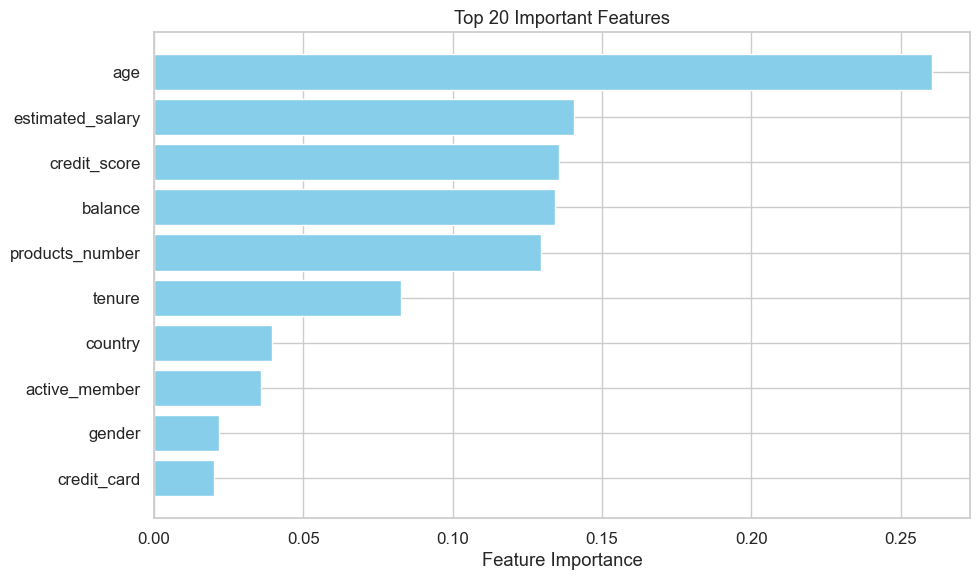

In [502]:
plot_feature_importance(best_rf, feature_names=X_df.columns)